In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
features = pd.read_csv("training_set_features.csv", index_col="respondent_id")
labels = pd.read_csv("training_set_labels.csv",index_col="respondent_id")
test_data = pd.read_csv("test_set_features.csv")

In [3]:
features.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
def fill_nulls(df):
    for col in df:
        if df[col].dtypes=="object":
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(h1n1_train_data[col].mean(), inplace=True)
    return df

In [8]:
h1n1_train_data, h1n1_val_data, h1n1_train_labels, h1n1_val_labels = train_test_split(
    features, labels['h1n1_vaccine'],
    test_size= 0.2)

In [9]:
h1n1_train_data = fill_nulls(h1n1_train_data)
h1n1_val_data = fill_nulls(h1n1_val_data)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [10]:
h1n1_train_data.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
17408,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,oxchjgsf,"MSA, Principle City",1.0,1.0,rucpziij,tfqavkke
3603,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,xtkaffoo
10404,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,"> $75,000",Married,Own,Employed,oxchjgsf,"MSA, Not Principle City",1.0,0.0,rucpziij,mxkfnird
5333,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,"<= $75,000, Above Poverty",Married,Rent,Employed,mlyzmhmf,"MSA, Principle City",3.0,1.0,fcxhlnwr,mxkfnird
12623,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,oxchjgsf,"MSA, Not Principle City",1.0,0.0,fcxhlnwr,xtkaffoo


In [11]:
for col in h1n1_train_data:
    print(col, (h1n1_train_data[col].isnull().sum()/len(h1n1_train_data))*100)

h1n1_concern 0.0
h1n1_knowledge 0.0
behavioral_antiviral_meds 0.0
behavioral_avoidance 0.0
behavioral_face_mask 0.0
behavioral_wash_hands 0.0
behavioral_large_gatherings 0.0
behavioral_outside_home 0.0
behavioral_touch_face 0.0
doctor_recc_h1n1 0.0
doctor_recc_seasonal 0.0
chronic_med_condition 0.0
child_under_6_months 0.0
health_worker 0.0
health_insurance 0.0
opinion_h1n1_vacc_effective 0.0
opinion_h1n1_risk 0.0
opinion_h1n1_sick_from_vacc 0.0
opinion_seas_vacc_effective 0.0
opinion_seas_risk 0.0
opinion_seas_sick_from_vacc 0.0
age_group 0.0
education 0.0
race 0.0
sex 0.0
income_poverty 0.0
marital_status 0.0
rent_or_own 0.0
employment_status 0.0
hhs_geo_region 0.0
census_msa 0.0
household_adults 0.0
household_children 0.0
employment_industry 0.0
employment_occupation 0.0


In [15]:
def category_encode(df):
    for col in df:
        if df[col].dtypes=="object":
            df[col] = df[col].astype('category')
            df[col] = df[col].cat.codes
    return df

In [16]:
h1n1_train_data = category_encode(h1n1_train_data)
h1n1_val_data = category_encode(h1n1_val_data)

In [18]:
log_reg = LogisticRegression()
log_reg.fit(h1n1_train_data, h1n1_train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
log_reg_preds = log_reg.predict(h1n1_val_data)
h1n1_acc_score = accuracy_score(h1n1_val_labels, log_reg_preds)
h1n1_prob = log_reg.predict_proba(h1n1_val_data)[:,1]
h1n1_auc_score = roc_auc_score(h1n1_val_labels, h1n1_prob)

In [20]:
print(h1n1_acc_score)
print(h1n1_auc_score)


0.8345189067764882
0.8407388699427012


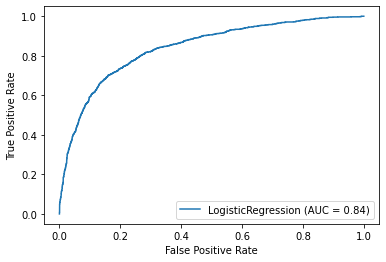

In [21]:
plot_roc_curve(log_reg, h1n1_val_data, h1n1_val_labels)  
plt.show()  

In [22]:
# GETTING THE CONFUSION MATRIX
cm1=np.array(confusion_matrix(h1n1_val_labels,log_reg_preds))
print(cm1)

[[3984  221]
 [ 663  474]]


<AxesSubplot:title={'center':'Logistic Regression- H1N1 Vaccine'}>

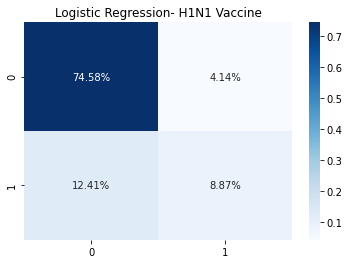

In [38]:
plt.title("Logistic Regression- H1N1 Vaccine")
sns.heatmap(cm1/np.sum(cm1), annot=True, 
            fmt='.2%', cmap='Blues')

SEASONAL MODEL

In [25]:
seasonal_train_data, seasonal_val_data, seasonal_train_labels, seasonal_val_labels = train_test_split(
    features, labels['seasonal_vaccine'],
    test_size= 0.2)

In [26]:
seasonal_train_data = fill_nulls(seasonal_train_data)
seasonal_val_data = fill_nulls(seasonal_val_data)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [27]:
seasonal_train_data = category_encode(seasonal_train_data)
seasonal_val_data = category_encode(seasonal_val_data)

<ipython-input-15-c5d2771f9309>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-15-c5d2771f9309>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].cat.codes


In [28]:
log_reg_seasonal = LogisticRegression()
log_reg_seasonal.fit(seasonal_train_data, seasonal_train_labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
seasonal_preds = log_reg_seasonal.predict(seasonal_val_data)
seasonal_acc_score = accuracy_score(seasonal_val_labels, seasonal_preds)
seasonal_prob = log_reg_seasonal.predict_proba(seasonal_val_data)[:, 1]
seasonal_auc_score = roc_auc_score(seasonal_val_labels, seasonal_prob)

In [30]:
print(seasonal_acc_score)
print(seasonal_auc_score)

0.7719955073006365
0.8441417723030074


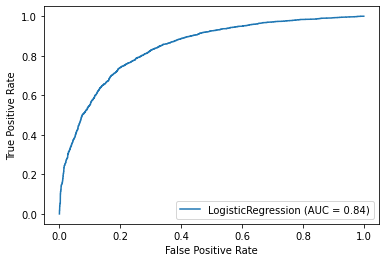

In [31]:
plot_roc_curve(log_reg_seasonal, seasonal_val_data, seasonal_val_labels)  
plt.show()  

In [32]:
# GETTING THE CONFUSION MATRIX
cm2=np.array(confusion_matrix(seasonal_val_labels,seasonal_preds))
print(cm2)

[[2297  549]
 [ 669 1827]]


<AxesSubplot:title={'center':'Logistic Regression- Seasonal Vaccine'}>

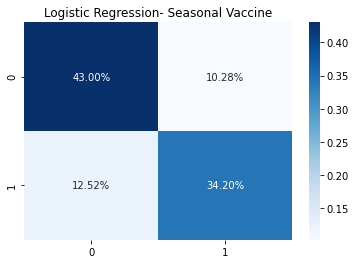

In [37]:
plt.title("Logistic Regression- Seasonal Vaccine")
sns.heatmap(cm2/np.sum(cm2), annot=True, 
            fmt='.2%', cmap='Blues')

In [34]:
print("AVG AUC: ", (h1n1_auc_score+seasonal_auc_score)/2)

AVG AUC:  0.8424403211228543
